# BEE 4750 Homework 2: Dissolved Oxygen

**Name**:

**ID**:

> **Due Date**
>
> Friday, 09/22/23, 9:00pm

## Overview

### Instructions

This assignment asks you to use a simulation model for dissolved oxygen
to assess the impacts of two wastewater streams, including minimum
treatment levels and the impact of uncertain environmental conditions.
You will also be asked to identify a minimum distance for the addition
of a third discharge stream.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [111]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\henry\Downloads\4750\Homework\New folder\hw02-henrysigel`

In [112]:
using Plots
using LaTeXStrings
using Distributions

## Problems (Total: 40 Points)

A river which flows at 6 km/d is receiving waste discharges from two
sources which are 15 km apart, as shown in
<a href="#fig-river" class="quarto-xref">Figure 1</a>. The oxygen
reaeration rate is 0.55 day<sup>-1</sup>, and the decay rates of CBOD
and NBOD are are 0.55 and 0.25 day<sup>-1</sup>, respectively. The
river’s saturated dissolved oxygen concentration is 10m g/L.

![Figure 1: Schematic of the
system](attachment:figures/river_diagram.png)

### Problem 1 (8 points)

If the characteristics of the river inflow and waste discharges are
given in <a href="#tbl-river" class="quarto-xref">Table 1</a>, write a
Julia model to compute the dissolved oxygen concentration from the first
wastewater discharge to an arbitrary distance `d` km downstream. Use
your model to compute the maximum dissolved oxygen concentration up to
50km downstream and how far downriver this maximum occurs.

|    Parameter     |            River Inflow |         Waste Stream 1 |         Waste Stream 2 |
|:----------------:|------------------------:|-----------------------:|-----------------------:|
|      Inflow      | 100,000 m<sup>3</sup>/d | 10,000 m<sup>3</sup>/d | 15,000 m<sup>3</sup>/d |
| DO Concentration |                7.5 mg/L |                 5 mg/L |                 5 mg/L |
|       CBOD       |                  5 mg/L |                50 mg/L |                45 mg/L |
|       NBOD       |                  5 mg/L |                35 mg/L |                35 mg/L |

Table 1: River inflow and waste stream characteristics for Problem 1.

4.815568530771925

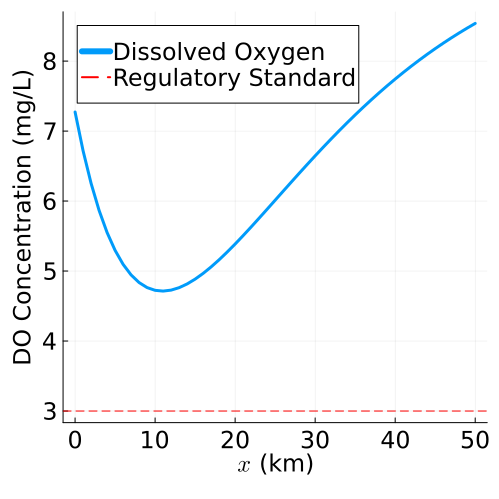

In [113]:
function dissolved_oxygen(x, Cs, C0, B0, N0, ka, kc, kn, U)
    alpha1 = exp(-ka * x / U) #Calculate alpha 1
    alpha2 = (kc / (ka - kc)) * (exp(-kc * x / U) - alpha1) #Calculate alpha 2
    alpha3 = (kn / (ka - kn)) * (exp(-kn * x / U) - alpha1) #Calculate alpha 2
    C = (Cs * (1 - alpha1)) + (C0 * alpha1) - (B0 * alpha2) - (N0 * alpha3) #use a modified DO concentration equation for one input
    return C
end

d = 50 #Distance Downstream

U = 6 #km/day
kn = .25 #1/day
kc = .35 #1/day
ka = .55 #1/day
N0 = 7.72 #mg/L
B0 = 9.09 #mg/L
C0 = ((7.5*100000)+(5*10000))/110000#7.27 #mg/L
Cs = 10 #mg/L
x = 0:1:d
C = (y -> dissolved_oxygen(y, Cs, C0, B0, N0, ka, kc, kn, U)).(x)

max_c = maximum(C) #Find and print the maximum value
#print(max_c)

print(C[15])
plot(x, C; linewidth=3,            #plot x, distance, on the X axis, and C, DO concentration, on the y axis
    label="Dissolved Oxygen", 
    tickfontsize=16, 
    guidefontsize=16, 
    legendfontsize=16)
xlabel!(L"$x$ (km)")
ylabel!("DO Concentration (mg/L)")
hline!([3], color=:red, 
    linestyle=:dash, 
    label="Regulatory Standard")
plot!(size=(500, 500))

The Maximum DO concetration is 50km downstream, and it is 8.54 mg/L

### Problem 2 (4 points)

Use your model to plot the dissolved oxygen concentration in the river
from the first waste stream to 50km downstream. What do you notice?

I notice that the lowest point is about 10 km downstream and the DO concentration climbs above the starting level at about 35 km. At 50 km it is still climbing which makes sense because Cs is 10 so it will climb until it hits that level.

### Problem 3 (3 points)

Under the assumptions of Problem 1, determine the distance from waste
stream 2 it will take for the dissolved oxygen concentration of the
river to recover to 6 mg/L.

C at 15 km is 4.814812770629047
N at 15 km is 4.132
B at 15 km is 3.789

C0 =4.836
N0 =7.836
B0 =8.734

2829303132333435363738394041424344454647484950

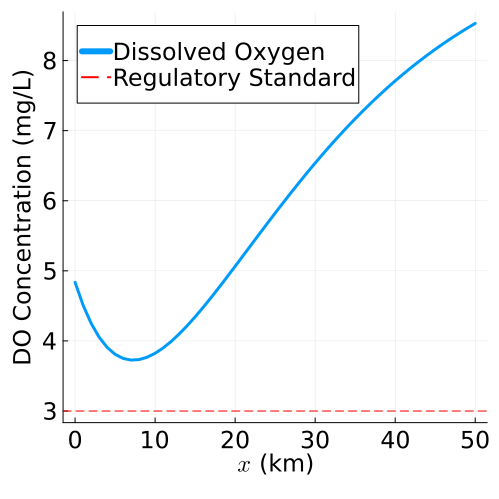

In [114]:
function dissolved_oxygen(x, Cs, C0, B0, N0, ka, kc, kn, U)
    alpha1 = exp(-ka * x / U) #Calculate alpha 1
    alpha2 = (kc / (ka - kc)) * (exp(-kc * x / U) - alpha1) #Calculate alpha 2
    alpha3 = (kn / (ka - kn)) * (exp(-kn * x / U) - alpha1) #Calculate alpha 2
    C = (Cs * (1 - alpha1)) + (C0 * alpha1) - (B0 * alpha2) - (N0 * alpha3) #use a modified DO concentration equation for one input
    return C
end

d = 50 #Distance Downstream

U = 6 #km/day
kn = .25 #1/day
kc = .35 #1/day
ka = .55 #1/day
N0 = 7.836 #mg/L
B0 = 8.734 #mg/L
C0 = 4.836 #mg/L
Cs = 10 #mg/L
x = 0:1:d
C = (y -> dissolved_oxygen(y, Cs, C0, B0, N0, ka, kc, kn, U)).(x)

for i = 1:d   #for loop to detirmine the distance from the second input that the DO concentration goes above 6
    if C[i] > 6
        print(i)
    end
end

plot(x, C; linewidth=3,            #plot x, distance, on the X axis, and C, DO concentration, on the y axis
    label="Dissolved Oxygen", 
    tickfontsize=16, 
    guidefontsize=16, 
    legendfontsize=16)
xlabel!(L"$x$ (km)")
ylabel!("DO Concentration (mg/L)")
hline!([3], color=:red, 
    linestyle=:dash, 
    label="Regulatory Standard")
plot!(size=(500, 500))

The Distance from input 2 that the DO concentration goes above 6 mg/L is 28 km

### Problem 4 (5 points)

What is the minimum level of treatment (% removal of organic waste) for
waste stream 2 that will ensure that the dissolved oxygen concentration
never drops below 4 mg/L, assuming that waste stream 1 remains
untreated?

0.108

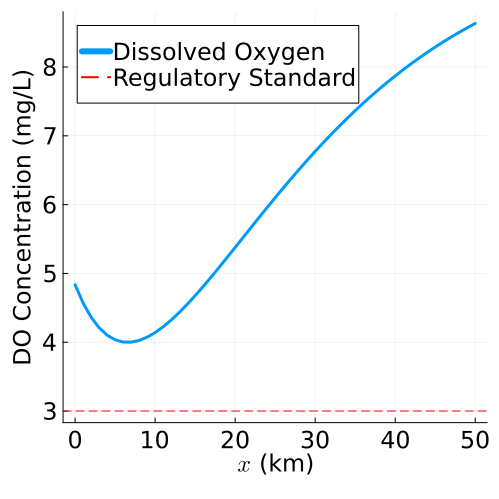

In [115]:
function dissolved_oxygen(x, Cs, C0, B0, N0, ka, kc, kn, U)
    alpha1 = exp(-ka * x / U) #Calculate alpha 1
    alpha2 = (kc / (ka - kc)) * (exp(-kc * x / U) - alpha1) #Calculate alpha 2
    alpha3 = (kn / (ka - kn)) * (exp(-kn * x / U) - alpha1) #Calculate alpha 2
    C = (Cs * (1 - alpha1)) + (C0 * alpha1) - (B0 * alpha2) - (N0 * alpha3) #use a modified DO concentration equation for one input
    return C
end

d = 50 #Distance Downstream
C0 = 4.836 #mg/L
Cs = 10 #mg/L
U = 6 #km/day
kn = .25 #1/day
kc = .35 #1/day
ka = .55 #1/day
x = 0:1:d
C = zeros(1,d)
for i = 0:.001:1      #loop to detirmine the removal percentage
    N0 = ((4.132*110000)+(35*(1-i)*15000))/125000                       #7.836*.923 #mg/L
    B0 = ((3.789*110000)+(43*(1-i)*15000))/125000                       #8.734*.923 #mg/L

    if minimum(C)<4 #loop to detirmine when the percentage removal goes about 4mg/L
        C = (y -> dissolved_oxygen(y, Cs, C0, B0, N0, ka, kc, kn, U)).(x)
    elseif minimum(C)>4
        print(i)
        break
    end
end

for i = 1:d   #for loop to detirmine the distance from the second input that the DO concentration goes above 6
    if C[i] > 6
        #print(i)
        break
    end
end
#print(minimum(C))
plot(x, C; linewidth=3,            #plot x, distance, on the X axis, and C, DO concentration, on the y axis
    label="Dissolved Oxygen", 
    tickfontsize=16, 
    guidefontsize=16, 
    legendfontsize=16)
xlabel!(L"$x$ (km)")
ylabel!("DO Concentration (mg/L)")
hline!([3], color=:red, 
    linestyle=:dash, 
    label="Regulatory Standard")
plot!(size=(500, 500))

You need %10.8 removal from waste stream 2 to insure the DO level does not drop below 4mg/L

### Problem 5 (5 points)

If both waste streams are treated equally, what is the minimum level of
treatment (% removal of organic waste) for the two sources required to
ensure that the dissolved oxygen concentration never drops below 4 mg/L?

decay_B0: 0.4168620196785084
decay_N0: 0.5352614285189903


0.088

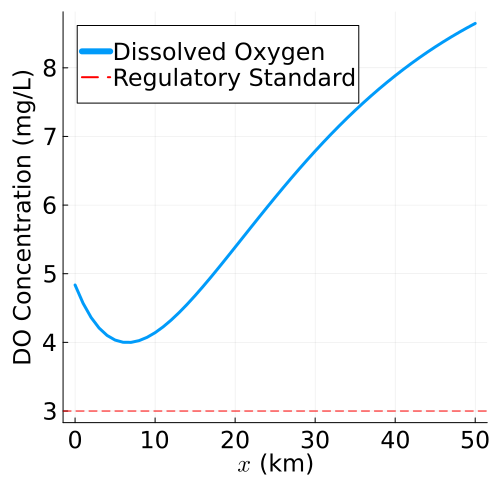

In [116]:
function dissolved_oxygen(x, Cs, C0, B0, N0, ka, kc, kn, U)
    alpha1 = exp(-ka * x / U) #Calculate alpha 1
    alpha2 = (kc / (ka - kc)) * (exp(-kc * x / U) - alpha1) #Calculate alpha 2
    alpha3 = (kn / (ka - kn)) * (exp(-kn * x / U) - alpha1) #Calculate alpha 2
    C = (Cs * (1 - alpha1)) + (C0 * alpha1) - (B0 * alpha2) - (N0 * alpha3) #use a modified DO concentration equation for one input
    return C
end

d = 50 #Distance Downstream
C0 = 4.836 #mg/L
Cs = 10 #mg/L
U = 6 #km/day
kn = .25 #1/day
kc = .35 #1/day
ka = .55 #1/day
x = 0:1:d
decay_B0 = (exp(-.35*(15/6))) #first order decay equations
decay_N0 = (exp(-.25*(15/6)))

println("decay_B0: ", string(decay_B0))
println("decay_N0: ", string(decay_N0))

C = zeros(1,d)
for i = 0:.001:1      #loop to detirmine the removal percentage
    N0 = ((((((5*100000)+(50*(1-i)*10000))/110000)*decay_B0)*110000)+(35*(1-i)*15000))/125000         #7.836*.923 #mg/L
    B0 = ((((((5*100000)+(35*(1-i)*10000))/110000)*decay_N0)*110000)+(43*(1-i)*15000))/125000          #8.734*.923 #mg/L

    if minimum(C)<4 #loop to detirmine when the percentage removal goes about 4mg/L
        C = (y -> dissolved_oxygen(y, Cs, C0, B0, N0, ka, kc, kn, U)).(x)
    elseif minimum(C)>4
        print(i)
        break
    end
end

for i = 1:d   #for loop to detirmine the distance from the second input that the DO concentration goes above 6
    if C[i] > 6
        #print(i)
        break
    end
end
#print(minimum(C))
plot(x, C; linewidth=3,            #plot x, distance, on the X axis, and C, DO concentration, on the y axis
    label="Dissolved Oxygen", 
    tickfontsize=16, 
    guidefontsize=16, 
    legendfontsize=16)
xlabel!(L"$x$ (km)")
ylabel!("DO Concentration (mg/L)")
hline!([3], color=:red, 
    linestyle=:dash, 
    label="Regulatory Standard")
plot!(size=(500, 500))

If both waste streams are treated equally the minimum percentage would be 8.8% removal

### Problem 6 (5 points)

Suppose you are responsible for designing a waste treatment plan for
discharges into the river, with a regulatory mandate to keep the
dissolved oxygen concentration above 4 mg/L. Discuss whether you’d opt
to treat waste stream 2 alone or both waste streams equally. What other
information might you need to make a conclusion, if any?

I would most likely choose to treat both of the stream equally. Of course this could change based off mayn unknown factors, such as, what is the value of each plant, in other words what are we getting in return for the waste output. Which plant was there first. How expensive would it be for each plant to impliment there specific waste stream.

### Problem 7 (5 points)

Suppose that it is known that the DO concentrations at the river inflow
can vary uniformly between 6 mg/L and 8 mg/L. How often will the
treatment plan identified in Problem 5 (both waste streams treated
equally) fail to comply with the regulatory standard?

4.817688459333058

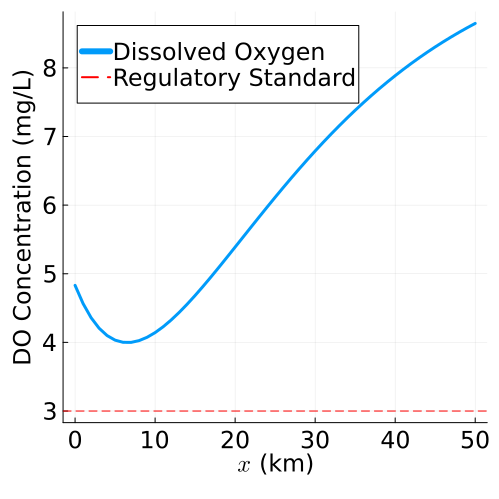

In [117]:
function dissolved_oxygen(x, Cs, C0, B0, N0, ka, kc, kn, U)
    alpha1 = exp(-ka * x / U) #Calculate alpha 1
    alpha2 = (kc / (ka - kc)) * (exp(-kc * x / U) - alpha1) #Calculate alpha 2
    alpha3 = (kn / (ka - kn)) * (exp(-kn * x / U) - alpha1) #Calculate alpha 2
    C = (Cs * (1 - alpha1)) + (C0 * alpha1) - (B0 * alpha2) - (N0 * alpha3) #use a modified DO concentration equation for one input
    return C
end

d = 50 #Distance Downstream
Cs = 10 #mg/L
U = 6 #km/day
kn = .25 #1/day
kc = .35 #1/day
ka = .55 #1/day
x = 0:1:d
decay_B0 = (exp(-.35*(15/6))) #first order decay equations
decay_N0 = (exp(-.25*(15/6)))


C = zeros(1,d)
#for i = 0:.001:1      #loop to detirmine the removal percentage
    for k = 4.437688459333058:.01:4.941528554584881
        N0 = ((((((5*100000)+(50*(1-.088)*10000))/110000)*decay_B0)*110000)+(35*(1-.088)*15000))/125000         #7.836*.923 #mg/L
        B0 = ((((((5*100000)+(35*(1-.088)*10000))/110000)*decay_N0)*110000)+(43*(1-.088)*15000))/125000          #8.734*.923 #mg/L
        C0 = ((k*110000)+(5*15000))/125000                       #C = 6 = 4.437688459333058, C= 8 = 4.941528554584881 -> these are the values 
        #that C0 equals at 15km, used early code to find these values

        if minimum(C)<4 #loop to detirmine when the percentage removal goes about 4mg/L
        C = (y -> dissolved_oxygen(y, Cs, C0, B0, N0, ka, kc, kn, U)).(x)
        elseif minimum(C)>4
        print(k)
        break
        end
    end
#end

for i = 1:d   #for loop to detirmine the distance from the second input that the DO concentration goes above 6
    if C[i] > 6
        #print(i)
        break
    end
end
#print(minimum(C))
plot(x, C; linewidth=3,            #plot x, distance, on the X axis, and C, DO concentration, on the y axis
    label="Dissolved Oxygen", 
    tickfontsize=16, 
    guidefontsize=16, 
    legendfontsize=16)
xlabel!(L"$x$ (km)")
ylabel!("DO Concentration (mg/L)")
hline!([3], color=:red, 
    linestyle=:dash, 
    label="Regulatory Standard")
plot!(size=(500, 500))

If the DO concentration at 15 km down stream is below 4.818 then it will drop below the regulator standards, which is equivilant to about 7.5 mg/L inflow levels

### Problem 8 (5 points)

A factory is planning a third wastewater discharge into the river
downstream of the second plant. This discharge would consist of 5
m<sup>3</sup>/day of wastewater with a dissolved oxygen content of 4.5
mg/L and CBOD and NBOD levels of 50 and 45 mg/L, respectively.

Assume that the treatment plan you identified in Problem 5 is still in
place for the existing discharges. If the third discharge will not be
treated, under the original inflow conditions (7.5 mg/L DO), how far
downstream from the second discharge does this third discharge need to
be placed to keep the river concentration from dropping below 4 mg/L?

0.088

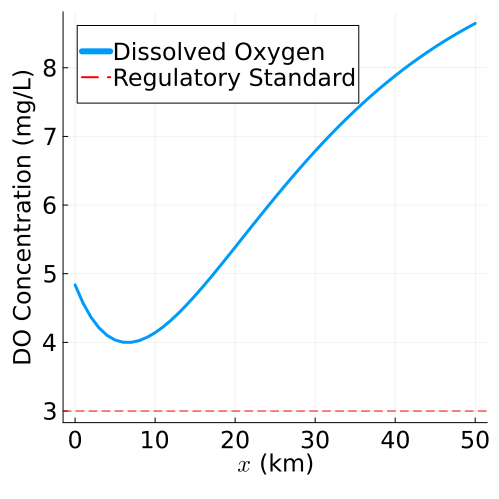

In [118]:
function dissolved_oxygen(x, Cs, C0, B0, N0, ka, kc, kn, U)
    alpha1 = exp(-ka * x / U) #Calculate alpha 1
    alpha2 = (kc / (ka - kc)) * (exp(-kc * x / U) - alpha1) #Calculate alpha 2
    alpha3 = (kn / (ka - kn)) * (exp(-kn * x / U) - alpha1) #Calculate alpha 2
    C = (Cs * (1 - alpha1)) + (C0 * alpha1) - (B0 * alpha2) - (N0 * alpha3) #use a modified DO concentration equation for one input
    return C
end

d = 50 #Distance Downstream
Cs = 10 #mg/L
U = 6 #km/day
kn = .25 #1/day
kc = .35 #1/day
ka = .55 #1/day
x = 0:1:d
decay_B0 = (exp(-.35*(15/6))) #first order decay equations
decay_N0 = (exp(-.25*(15/6)))


C = zeros(1,d)
for i = 0:.001:1      #loop to detirmine the removal percentage

    N0 = (((((((((5*100000)+(50*(1-i)*10000))/110000)*decay_B0)*110000)+(35*(1-i)*15000))/125000) *125000)+(5*45))/125005       #7.836*.923 #mg/L
    B0 = (((((((((5*100000)+(35*(1-i)*10000))/110000)*decay_N0)*110000)+(43*(1-i)*15000))/125000) *125000)+(5*50))/125005         #8.734*.923 #mg/L
    C0 = ((4.8155*110000)+(5*15000))/125000                       #C = 6 = 4.437688459333058, C= 8 = 4.941528554584881 -> these are the values 
    #that C0 equals at 15km, used early code to find these values

    if minimum(C)<4 #loop to detirmine when the percentage removal goes about 4mg/L
    C = (y -> dissolved_oxygen(y, Cs, C0, B0, N0, ka, kc, kn, U)).(x)
    elseif minimum(C)>4
    print(i)
    break
    end
end

for i = 1:d   #for loop to detirmine the distance from the second input that the DO concentration goes above 6
    if C[i] > 6
        #print(i)
        break
    end
end
#print(minimum(C))
plot(x, C; linewidth=3,            #plot x, distance, on the X axis, and C, DO concentration, on the y axis
    label="Dissolved Oxygen", 
    tickfontsize=16, 
    guidefontsize=16, 
    legendfontsize=16)
xlabel!(L"$x$ (km)")
ylabel!("DO Concentration (mg/L)")
hline!([3], color=:red, 
    linestyle=:dash, 
    label="Regulatory Standard")
plot!(size=(500, 500))

Becuase the Flow is so low it can be placed anywhere along the river 

## References

List any external references consulted, including classmates.